## Import necessary libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, classification_report

In [6]:
# importing the dataset
df = pd.read_csv('data/creditcard_2023.csv')
df.sample(10)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
290192,290192,-0.082831,-0.444842,0.167905,-0.431431,-0.044962,0.335160,0.146508,-0.181075,0.241415,...,-0.045424,0.098771,-0.028752,-0.796149,0.184736,0.947043,-0.832067,0.920008,16539.69,1
120948,120948,-0.010769,-0.212185,1.073955,-0.723318,0.177362,0.495301,0.583873,-0.139070,0.491801,...,-0.137267,0.019968,-0.295545,-0.524003,0.281283,2.329878,-0.709586,-0.892476,23443.68,0
99424,99424,-0.021102,-0.122188,0.290428,-1.351182,1.667596,2.073813,0.567540,0.053355,0.229761,...,-0.310975,-1.315541,0.148815,2.088046,-0.917072,-0.472809,0.328158,0.570151,11401.81,0
321791,321791,-0.449492,1.154410,-1.314851,1.812523,-0.283639,-1.378533,-1.076428,0.365438,-1.799828,...,0.517891,-0.282952,-0.646123,-1.878231,2.798246,1.426832,2.987675,2.536749,8575.00,1
313283,313283,0.183161,-0.073609,-0.142710,-0.055543,-0.214934,-0.306388,-0.187869,-0.016088,-0.110478,...,0.087608,0.115412,-0.149459,0.635524,0.564235,1.377802,0.255945,0.510036,4692.17,1
202718,202718,-0.035716,-0.097890,0.368797,-0.611289,0.172804,-0.488859,1.191060,-0.272947,0.434652,...,0.024855,1.197923,-0.143665,1.940317,-0.940387,-0.514989,0.136839,0.623637,4471.27,0
443766,443766,-1.052425,-1.334623,-0.612112,0.184133,-0.000806,0.230290,-0.452389,0.375772,-0.418600,...,0.377380,1.101588,-1.342780,-2.198960,-0.481716,0.232706,0.915832,-1.600803,13341.04,1
170989,170989,1.899419,-1.047276,0.222831,-1.492554,-0.248242,0.056462,0.081290,-0.173722,-0.165625,...,-0.135896,0.097122,0.205767,0.128141,-0.602320,-0.476560,-0.229797,-0.219972,6446.93,0
393971,393971,-1.993468,2.234996,-1.982264,1.177892,-2.312774,-2.307227,-1.884115,3.238351,-1.221192,...,0.545833,-1.085735,-0.656792,0.247726,1.919661,-0.535112,2.206142,1.100485,9880.59,1
443784,443784,0.230900,-0.183276,0.340971,-0.541640,0.620878,0.170978,0.615483,-0.145056,0.380510,...,-0.202184,-0.558220,0.069124,1.252462,-0.934332,0.461023,-0.156920,-0.106954,266.16,1


In [10]:
df.tail()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1
568629,568629,-0.795144,0.433236,-0.649140,0.374732,-0.244976,-0.603493,-0.347613,-0.340814,0.253971,...,0.534853,-0.291514,0.157303,0.931030,-0.349423,-1.090974,-1.575113,0.722936,21493.92,1


In [8]:
df.shape

(568630, 31)

In [9]:
df.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [14]:
# Checking the missing values in the ds
df.isnull().sum()
# There is no missing values in the dataset

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
# Checking the distribution of the class of transaction
df['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [23]:
df.Amount.describe()

count    568630.000000
mean      12041.957635
std        6919.644449
min          50.010000
25%        6054.892500
50%       12030.150000
75%       18036.330000
max       24039.930000
Name: Amount, dtype: float64

Text(0.5, 1.0, 'Class distribution \n (0: Legit || 1: Fraud)')

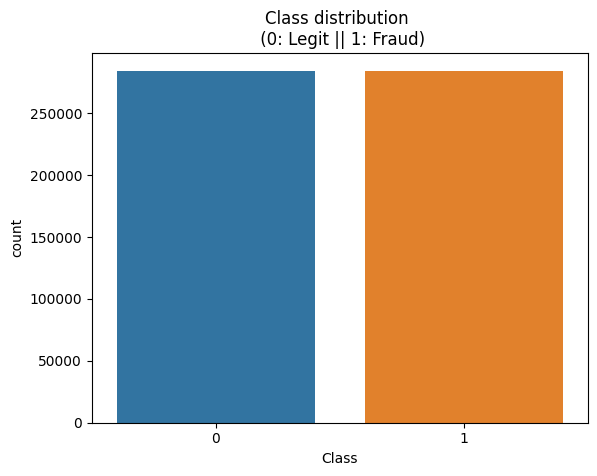

In [21]:
sns.countplot(data=df,x='Class')
plt.title ('Class distribution \n (0: Legit || 1: Fraud)', fontsize=12)

In [26]:
# Seperating the data into two category by Class
legit = df[df.Class ==0]
print(Legit)
fraud = df[df.Class ==1]
print(fraud)

            id        V1        V2        V3        V4        V5        V6  \
541        541 -0.478427  0.142165 -0.046838  0.683350  0.067820 -0.404898   
623        623 -0.617111 -1.733888  1.150655  0.207829  0.903533 -0.171524   
4920      4920 -0.476617  0.088942  0.326333  0.220370 -0.026730  0.432409   
6108      6108 -0.832953 -0.024254 -0.260967  0.323532 -0.117119 -0.589167   
6329      6329  1.020308  0.425645 -0.554113  0.868349  2.367343 -0.360087   
...        ...       ...       ...       ...       ...       ...       ...   
568625  568625 -0.833437  0.061886 -0.899794  0.904227 -1.002401  0.481454   
568626  568626 -0.670459 -0.202896 -0.068129 -0.267328 -0.133660  0.237148   
568627  568627 -0.311997 -0.004095  0.137526 -0.035893 -0.042291  0.121098   
568628  568628  0.636871 -0.516970 -0.300889 -0.144480  0.131042 -0.294148   
568629  568629 -0.795144  0.433236 -0.649140  0.374732 -0.244976 -0.603493   

              V7        V8        V9  ...       V21       V22  

In [27]:
legit.Amount.describe()

count    284315.000000
mean      12026.313506
std        6929.500715
min          50.120000
25%        6034.540000
50%       11996.900000
75%       18040.265000
max       24039.930000
Name: Amount, dtype: float64

In [28]:
fraud.Amount.describe()

count    284315.000000
mean      12057.601763
std        6909.750891
min          50.010000
25%        6074.640000
50%       12062.450000
75%       18033.780000
max       24039.930000
Name: Amount, dtype: float64

In [29]:
df.groupby('Class').mean()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,142442.987714,0.505761,-0.491878,0.682095,-0.735981,0.338639,0.435088,0.491234,-0.144294,0.585522,...,-0.179851,-0.10964,-0.014098,-0.010255,0.130107,-0.061847,-0.071052,-0.214002,-0.102024,12026.313506
1,426186.012286,-0.505761,0.491878,-0.682095,0.735981,-0.338639,-0.435088,-0.491234,0.144294,-0.585522,...,0.179851,0.10964,0.014098,0.010255,-0.130107,0.061847,0.071052,0.214002,0.102024,12057.601763


## Machine Learning Part

In [31]:
# Splitting the data into Feature and targets
X = df.drop(columns='Class', axis=1)
y = df['Class']

In [32]:
X.shape

(568630, 30)

In [34]:
y.shape
print(y)

0         0
1         0
2         0
3         0
4         0
         ..
568625    1
568626    1
568627    1
568628    1
568629    1
Name: Class, Length: 568630, dtype: int64


In [35]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify =y, random_state=2)

In [44]:
print(X_train.shape, y_train.shape)

(454904, 30) (454904,)


In [38]:
model= LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Model Evaluation

In [46]:
X_train_pred = model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_pred, y_train)

In [48]:
print('Accuracy on training data is:', train_data_accuracy)

Accuracy on training data is: 0.791257056433885


In [51]:
X_test_pred = model.predict(X_test)
test_data_acc = accuracy_score(X_test_pred, y_test)
print('Accuracy data is;', test_data_acc)
print(classification_report(X_test_pred, y_test))

Accuracy data is; 0.7913317974781492
              precision    recall  f1-score   support

           0       0.67      0.89      0.76     42542
           1       0.92      0.73      0.81     71184

    accuracy                           0.79    113726
   macro avg       0.79      0.81      0.79    113726
weighted avg       0.82      0.79      0.79    113726



In [53]:
confusion = confusion_matrix(y_test, X_test_pred)
confusion

array([[37837, 19026],
       [ 4705, 52158]], dtype=int64)

<Axes: >

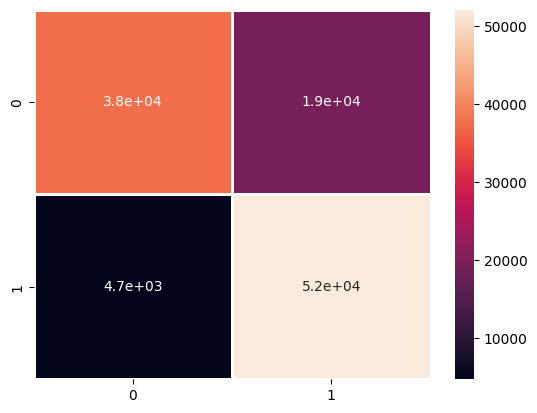

In [54]:
sns.heatmap(confusion, annot=True, linecolor='white', linewidths=1)

In [55]:
from xgboost import XGBClassifier, plot_importance

In [56]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [59]:
x_test_pred = xgb.predict(X_test)
print(classification_report(y_test,x_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



<Axes: >

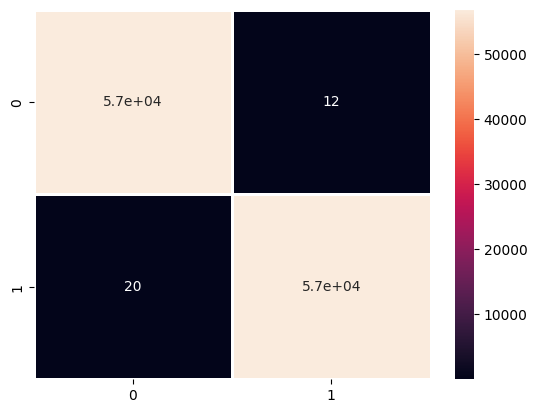

In [62]:
confusion_m = confusion_matrix(y_test, x_test_pred)
sns.heatmap(confusion_m, annot=True, linecolor='white', linewidths=2)

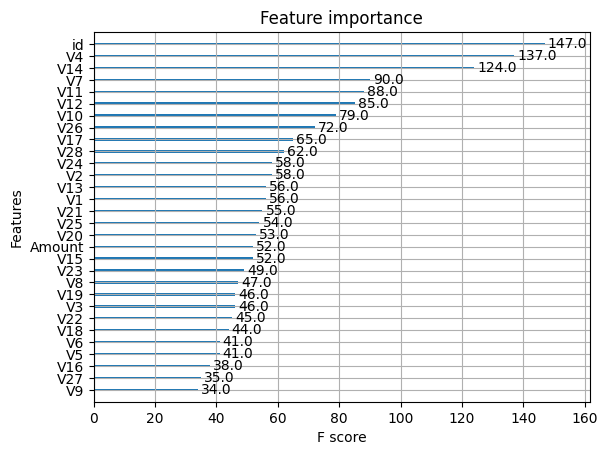

In [63]:
plot_importance(xgb)
plt.show()